<h1><center>Primeiro Teste de Criação de Mapas com Python</center></h1>

<h2><center>⚠ Alerta ⚠ </center></h2>
<h3><center>⚠ Esse conteúdo pode ser chato à alguns leitores por se tratar de algo que desenvolvi registrando o passo à passo, considerei importante anotar meu progresso para o Mateus do futuro ⚠ </center></h3>
<h2><center>⚠ Fim Alerta ⚠ </center></h2>


#  1: O que eu queria fazer e porquê deu errado

Minha ideia inicial era fazer belos mapas inspirados por esses projetos aqui -> https://github.com/symmy596/PythonMaps

Eu estava entrando em terreno desconhecido, teria que aprender novas bibliotecas e além disso os dados para plotagem como do link acima perceptivelmente pesado dada tamanha riqueza de detalhes... mas fica bem legal, busco aprender algum dia com calma

Para evitar maiores frustrações vamos com calma, esse vem sendo meu maior problema, sempre busco atingir algo que não posso ainda, não tenho o conhecimento necessário para reproduzir mapas como do link acima que apesar desses projetos mais complexos serem mais empolgantes temos que lembrar de uma frase que esqueci de onde escutei: "Para ter cinco anos de experiência, é preciso ter cinco anos de experiência "

## 1.2 Considerações sobre um conteúdo de qualidade:

Podemos plotar mapas baseado em formatos geométricos como pontos,linhas e polígonos. Um lugar que explica isso muuito bem em português é na aula abaixo, coloquei o notebook e a playlist do youtube

https://github.com/synapsedatascience/aulas-youtube/blob/main/minicurso-geopandas/02_objetos_geometricos.ipynb
https://www.youtube.com/playlist?list=PLcgrCjGCdYEIjsld1gTm_oJETNJWYN8Yy


# 2. Indo por outros lados


 Eu só queria dar o primeiro passo na criação de mapas, então quis começar por pontos. E para isso podemos simplesmente usar um gráfico de dispersão do matplotlib sem se aprofundar em bibliotecas de foco mais geográfico
 
 Depois de tanto consumir conteúdo de fora do país, queria algo mais brasileiro, por isso decidi buscar um dataset brasileiro e depois de abrir diversos, encontrei o dataset de vilas indígenas no Brasil

Achei ele perfeito para o primeiro projeto pois envolvia a simplicidade de apenas marcar pontos no mapa e ser um conteúdo brasileiro

# 3. Finalmente o Início

<h1><center><a href="https://www.gov.br/funai/pt-br/atuacao/terras-indigenas/geoprocessamento-e-mapas">Fonte dos dados</a></center></h1>


Importando os dados

In [39]:
import pandas as pd

df = pd.read_csv('aldeias_pontos.csv')

df.head(5)

,FID,cod_aldeia,nome_aldeia,cod_ti,cod_municipio,data_cadastro,flag_ativo,nome_cr,the_geom,nommunic,nomuf,undadm_codigo,coord_lat,coord_long
0,aldeias_pontos.fid-694632b_182e5a60386_-1b81,1626,11 DE SETEMBRO,33801,5107065,19/04/2018,A,COORDENACAO REGIONAL DO XINGU,POINT (-53.2047777778 -11.3278444444),Querência,Mato Grosso,30202002060,-11.327844,-53.204778
1,aldeias_pontos.fid-694632b_182e5a60386_-1b80,61,12 de Outubro,17301,5101902,NaN,A,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,POINT (-57.933888888889 -12.801388888889),Brasnorte,Mato Grosso,30202002032,-12.801389,-57.933889
2,aldeias_pontos.fid-694632b_182e5a60386_-1b7f,60,13 de Maio,17301,5101902,NaN,A,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,POINT (-57.901388888889 -12.800277777778),Brasnorte,Mato Grosso,30202002032,-12.800278,-57.901389
3,aldeias_pontos.fid-694632b_182e5a60386_-1b7e,2346,14 de Abril (Central),40701,1100098,13/07/2018,A,COORDENACAO REGIONAL DE CACOAL,POINT (-60.6708888889 -11.3573888889),Espigão D´Oeste,Rondônia,30202001934,-11.357389,-60.670889
4,aldeias_pontos.fid-694632b_182e5a60386_-1b7d,3084,18 Praias,15701,1200609,05/09/2018,A,COORDENACAO REGIONAL DO JURUÁ,POINT (-70.7596055556 -8.23643611111),Tarauacá,Acre,30202001852,-8.236436,-70.759606


Checando valores faltantes 

In [21]:
print('Todos os valores faltantes são da coluna data_cadastro o que não afeta o projeto')
df.isnull().sum()

Todos os valores faltantes são da coluna data_cadastro o que não afeta o projeto


FID                0
cod_aldeia         0
nome_aldeia        0
cod_ti             0
cod_municipio      0
data_cadastro    563
flag_ativo         0
nome_cr            0
the_geom           0
nommunic           0
nomuf              0
undadm_codigo      0
coord_lat          0
coord_long         0
dtype: int64

In [46]:
print('Temos ao todo ',df['cod_aldeia'].nunique(),' aldeias')

Temos ao todo  4474  aldeias


<AxesSubplot:>

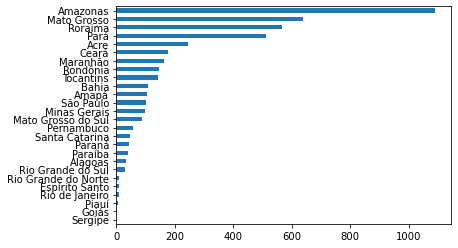

In [53]:
#plotizinho por curiosidade só pra ver os estados com mais aldeias
df['nomuf'].value_counts().sort_values().plot(kind = 'barh')

# 4. Só agora os mapas

No dataset temos colunas de latitude e longitude que se plotados como gráfico de dispersão já podemos começar a visualizar o mapa do Brasil

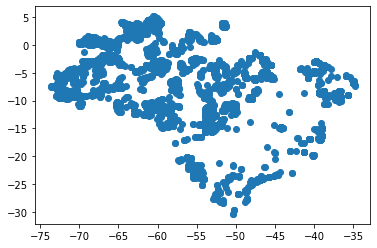

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['coord_long'], df['coord_lat'])
plt.show()

E foi aí que o youtube e seu algorítmo de ler mentes me recomendou um vídeo do programação dinâmica sobre plotar mapas com scatterplot, era o que eu já estava fazendo só que melhor, link do vídeo: https://www.youtube.com/watch?v=W5RySbHukVs

Então apartir do vídeo eu pude aperfeiçoar o mapa. Cada pontinho é uma vila e claro quen não fiz em escalla certinha

<AxesSubplot:title={'center':'Aldeias indígenas no Brasil'}, xlabel='coord_long', ylabel='coord_lat'>

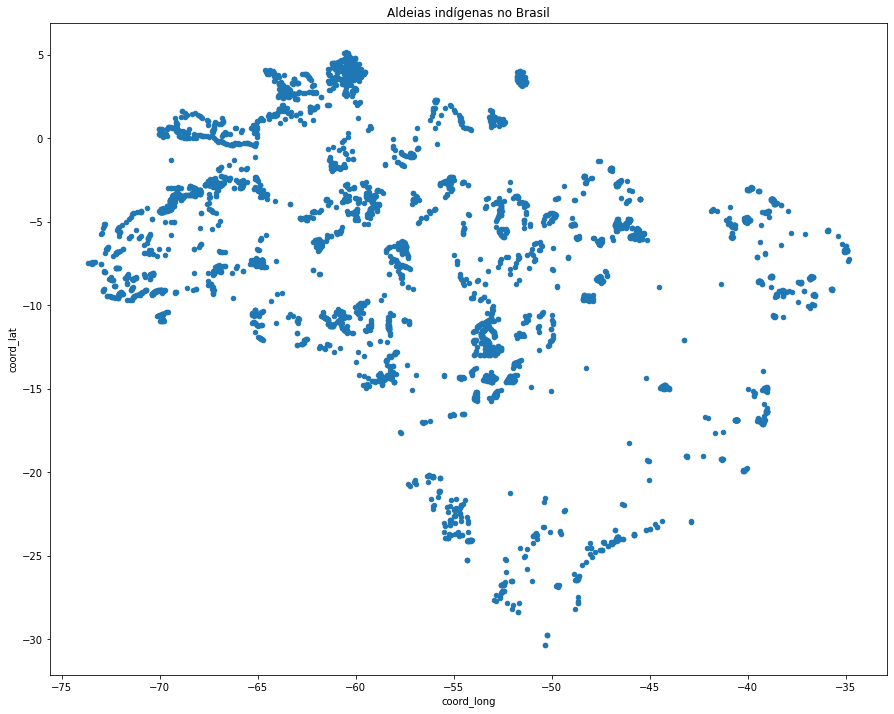

In [57]:
df.plot.scatter(y='coord_lat',x='coord_long',
                figsize=(15,12),
               title='Aldeias indígenas no Brasil')

Foi aí que tive o problema em encontrar uma cor boa para demonstrar na visualização a diferença de vilas entre munípios, sério, não encontrei mesmo uma boa combinação de cor, tá aqui o site com a lista de cores disponíveis para isso -->
https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:title={'center':'Aldeias indígenas por município'}, xlabel='coord_long', ylabel='coord_lat'>

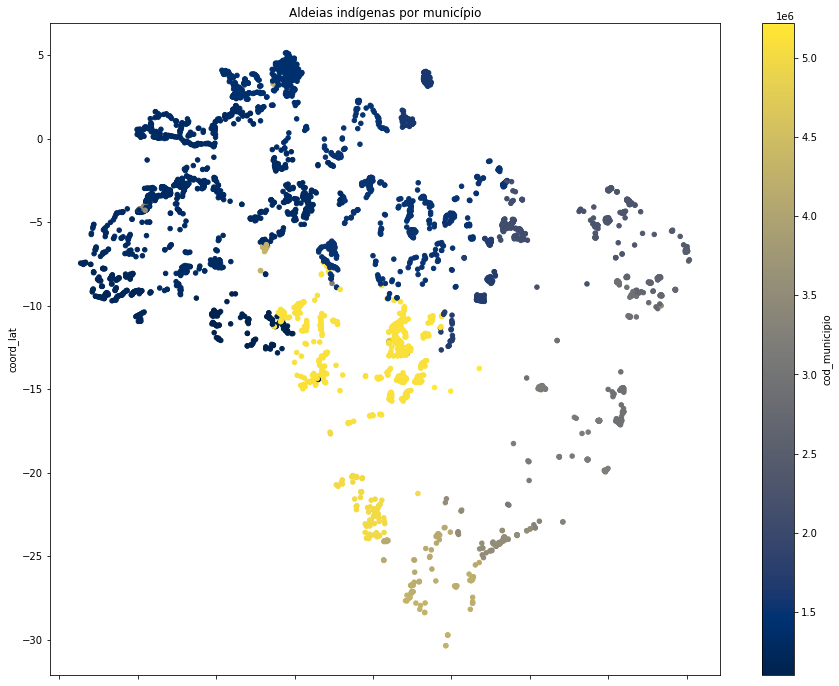

In [59]:
df.plot.scatter(y='coord_lat',x='coord_long',
                c='cod_municipio',
                cmap='cividis',
                figsize=(15,12),
               title='Aldeias indígenas por município')

# Conclusão

Tentei explorar mais e fazer divisões por estado coisas assim e não ocorreu como imaginado, mas aceitei e achei interessante apesar de simples

Foi um projeto simples e inicial que poderia ser complementado de maiores insights através de dados temporais e cruzamento de dados. É realmente algo interessante de se explorar

Podemos ver a vastidão de aldeias que possuímos no Brasil, uma grande distribuição no norte e no mato grosso e podemos ver uma distribuição no litoral de São Paulo na qual já visitei como as Terras Indigenas Do Rio Silveira que é um lindo lugar

Link para ver mais sobre a aldeia indígena do rio silveira --> https://www.youtube.com/watch?v=8Gu3990J3FY